In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pingouin as pg

/opt/miniconda3/envs/databs/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/opt/miniconda3/envs/databs/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.6, the latest is 0.5.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
IO_raw = pd.read_csv('/Users/labc02/Documents/PDCB_data/fEPSP_data/fepsp_IO.csv')

In [3]:
IO_raw

,Date,Genotype,Synapse,Step_uI,Slope_1,Slope_2,Amp_1,Amp_2,PPF_Amp,PPF_Slope
0,271020,KO,AC,0,0.000,0.000,-0.010,-0.010,0.96,0.76
1,271020,KO,AC,5,-0.010,-0.010,-0.030,-0.050,1.35,1.64
2,271020,KO,AC,10,-0.040,-0.080,-0.080,-0.130,1.61,2.17
3,271020,KO,AC,15,-0.120,-0.190,-0.150,-0.230,1.51,1.56
4,271020,KO,AC,20,-0.200,-0.260,-0.210,-0.300,1.42,1.32
...,...,...,...,...,...,...,...,...,...,...
477,110321,KO,AC,50,-0.143,-0.279,-0.334,-0.581,1.74,1.96
478,110321,KO,AC,55,-0.155,-0.295,-0.355,-0.595,1.68,1.90
479,110321,KO,AC,60,-0.157,-0.287,-0.352,-0.592,1.68,1.82
480,110321,KO,AC,65,-0.167,-0.298,-0.345,-0.589,1.71,1.79


In [4]:
IO_raw.groupby(['Genotype','Synapse', 'Date']).count()

Step_uI  Slope_1  Slope_2  Amp_1  Amp_2  PPF_Amp  \
Genotype Synapse Date                                                         
KO       AC      110321         15       15       15     15     15       15   
                 160221         15       15       15     15     15       15   
                 201220         12       12       12     12     12       12   
                 21120          13       13       13     13     13       13   
                 260221         12       12       12     12     12       12   
                 271020         13       13       13     13     13       13   
                 281020         12       12       12     12     12       12   
                 281020_2       13       13       13     13     13       13   
                 281021          1        1        1      1      1        1   
         MF      11220          18       18       18     18     18       18   
                 160221         16       16       16     16     16       16   
                 201220         13       13       13     13     13       13   
                 211120         18       18       18     18     18       18   
                 260221         17       17       17     17     17       17   
                 281020         18       18       18     18     18       18   
WT       AC      150221         19       19       19     19     19       19   
                 180221         19       19       19     19     19       19   
                 250221         20       20       20     20     20       20   
                 251120         13       13       13     13     13       13   
                 271120         13       13       13     13     13       13   
                 301120         13       13       13     13     13       13   
                 80321          11       11       11     11     11       11   
                 80321_2        13       13       13     13     13       13   
         MF      150221         21       21       21     21     21       21   
                 180221         16       16       16     16     16       16   
                 211220         15       15       15     15     15       15   
                 21220          20       20       20     20     20       20   
                 250221         15       15       15     15     15       15   
                 251120         15       15       15     15     15       15   
                 261120         21       21       21     21     21       21   
                 271120         18       18       18     18     18       18   
                 90221          14       14       14     14     14       14   

                           PPF_Slope  
Genotype Synapse Date                 
KO       AC      110321           15  
                 160221           15  
                 201220           12  
                 21120            13  
                 260221           12  
                 271020           13  
                 281020           12  
                 281020_2         13  
                 281021            1  
         MF      11220            18  
                 160221           16  
                 201220           13  
                 211120           18  
                 260221           17  
                 281020           18  
WT       AC      150221           19  
                 180221           19  
                 250221           20  
                 251120           13  
                 271120           13  
                 301120           13  
                 80321            11  
                 80321_2          13  
         MF      150221           21  
                 180221           16  
                 211220           15  
                 21220            20  
                 250221           15  
                 251120           15  
                 261120           21  
                 271120           18  
                 90221            14

In [5]:
IO_AC = IO_raw[(IO_raw['Synapse'] == 'AC') & (IO_raw['Step_uI']<75)]

In [6]:
IO_AC.loc[:,'Amp_1'] = IO_AC['Amp_1'].abs()

/opt/miniconda3/envs/databs/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [7]:
IO_AC.loc[:,'Slope_1'] = IO_AC['Slope_1'].abs()

In [8]:
pg.mixed_anova(data = IO_AC, dv = 'Amp_1', within = 'Step_uI', between = 'Genotype', subject = 'Date')

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Genotype,0.067859,1,14,0.067859,0.530983,4.782070e-01,0.036541,NaN
1,Step_uI,3.202725,14,196,0.228766,166.045647,1.842625e-100,0.922242,0.113348
2,Interaction,0.028236,14,196,0.002017,1.463880,1.276408e-01,0.094664,NaN


In [9]:
ph_AC = pg.pairwise_ttests(data = IO_AC, dv = 'Amp_1', between = 'Genotype', within = 'Step_uI', subject = 'Date', padjust = 'holm')

/opt/miniconda3/envs/databs/lib/python3.8/site-packages/pingouin/parametric.py:197: UserWarning: x and y have unequal sizes. Switching to paired == False. Check your data.
  warnings.warn("x and y have unequal sizes. Switching to "
/opt/miniconda3/envs/databs/lib/python3.8/site-packages/pingouin/effsize.py:689: UserWarning: x and y have unequal sizes. Switching to paired == False.
  warnings.warn("x and y have unequal sizes. Switching to "


In [10]:
ph_AC[ph_AC['Contrast'] == 'Step_uI * Genotype']

,Contrast,Step_uI,A,B,Paired,Parametric,T,dof,Tail,p-unc,p-corr,p-adjust,BF10,hedges
106,Step_uI * Genotype,0,KO,WT,False,True,1.108491,14.000000,two-sided,0.286330,1.0,holm,0.643,0.524014
107,Step_uI * Genotype,5,KO,WT,False,True,1.352220,14.000000,two-sided,0.197746,1.0,holm,0.777,0.639231
108,Step_uI * Genotype,10,KO,WT,False,True,1.171916,14.000000,two-sided,0.260789,1.0,holm,0.673,0.553997
109,Step_uI * Genotype,15,KO,WT,False,True,1.414821,14.000000,two-sided,0.178977,1.0,holm,0.82,0.668824
110,Step_uI * Genotype,20,KO,WT,False,True,1.376432,14.000000,two-sided,0.190305,1.0,holm,0.793,0.650677
111,Step_uI * Genotype,25,KO,WT,False,True,1.057108,14.000000,two-sided,0.308363,1.0,holm,0.62,0.499724
112,Step_uI * Genotype,30,KO,WT,False,True,0.760956,14.000000,two-sided,0.459309,1.0,holm,0.52,0.359725
113,Step_uI * Genotype,35,KO,WT,False,True,0.539354,14.000000,two-sided,0.598116,1.0,holm,0.472,0.254967
114,Step_uI * Genotype,40,KO,WT,False,True,0.515110,14.000000,two-sided,0.614513,1.0,holm,0.468,0.243507
115,Step_uI * Genotype,45,KO,WT,False,True,0.623232,14.000000,two-sided,0.543153,1.0,holm,0.488,0.294619


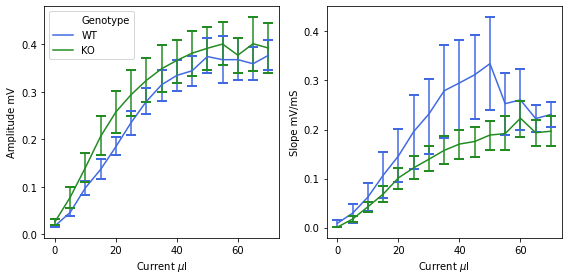

In [11]:
AC_fig, axs = plt.subplots(1, 2, figsize = (8,4))
sns.lineplot(x = 'Step_uI', y = 'Amp_1', data = IO_AC, hue = 'Genotype', hue_order = ['WT', 'KO'], palette = ['royalblue', 'forestgreen'], markers = {'marker': 'o', 'marker_size':10}, err_style = 'bars', ci = 68, err_kws = {'capsize': 5, 'capthick': 2}, ax = axs[0])
axs[0].set_ylabel('Amplitude mV')
axs[0].set_xlabel(r'Current $\mu$I')

sns.lineplot(x = 'Step_uI', y = 'Slope_1', data = IO_AC, hue = 'Genotype', hue_order = ['WT', 'KO'], palette = ['royalblue', 'forestgreen'], markers = {'marker': 'o', 'marker_size':10}, err_style = 'bars', ci = 68, err_kws = {'capsize': 5, 'capthick': 2}, ax = axs[1])
axs[1].set_ylabel('Slope mV/mS')
axs[1].set_xlabel(r'Current $\mu$I')
axs[1].get_legend().remove()
plt.tight_layout()

In [44]:
AC_fig.savefig('/Users/labc02/Documents/PDCB_data/Behavior/Figures/AC_IO.svg')

In [12]:
IO_MF = IO_raw[(IO_raw['Synapse'] == 'MF') & (IO_raw['Step_uI'] < 80)]
IO_MF.loc[:,'Amp_1'] = IO_MF['Amp_1'].abs()
IO_MF.loc[:,'Slope_1'] = IO_MF['Slope_1'].abs()

/opt/miniconda3/envs/databs/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [13]:
pg.mixed_anova(data = IO_MF, dv = 'Amp_1', between = 'Genotype', within = 'Step_uI', subject = 'Date')

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Genotype,0.727790,1,13,0.727790,1.402557,2.574975e-01,0.097382,NaN
1,Step_uI,17.716108,15,195,1.181074,69.616934,9.544985e-70,0.842647,0.077775
2,Interaction,0.819212,15,195,0.054614,3.219163,9.034239e-05,0.198479,NaN


In [14]:
ph_MF = pg.pairwise_ttests(data = IO_MF, dv = 'Amp_1', between = 'Genotype', within = 'Step_uI', subject = 'Date', marginal = True, padjust = 'holm', tail = 'one-sided')

/opt/miniconda3/envs/databs/lib/python3.8/site-packages/pingouin/parametric.py:197: UserWarning: x and y have unequal sizes. Switching to paired == False. Check your data.
  warnings.warn("x and y have unequal sizes. Switching to "
/opt/miniconda3/envs/databs/lib/python3.8/site-packages/pingouin/effsize.py:689: UserWarning: x and y have unequal sizes. Switching to paired == False.
  warnings.warn("x and y have unequal sizes. Switching to "


In [15]:
ph_MF[ph_MF['Contrast'] == 'Step_uI * Genotype']

,Contrast,Step_uI,A,B,Paired,Parametric,T,dof,Tail,p-unc,p-corr,p-adjust,BF10,hedges
121,Step_uI * Genotype,0,KO,WT,False,True,0.406296,12.650857,one-sided,0.345657,1.000000,holm,0.934,0.190373
122,Step_uI * Genotype,5,KO,WT,False,True,-0.079463,8.923966,one-sided,0.469209,1.000000,holm,0.886,-0.041590
123,Step_uI * Genotype,10,KO,WT,False,True,0.482376,6.283762,one-sided,0.322942,1.000000,holm,0.955,0.277798
124,Step_uI * Genotype,15,KO,WT,False,True,0.451502,6.947745,one-sided,0.332692,1.000000,holm,0.946,0.252653
125,Step_uI * Genotype,20,KO,WT,False,True,0.169381,7.694801,one-sided,0.434932,1.000000,holm,0.893,0.092182
126,Step_uI * Genotype,25,KO,WT,False,True,-0.109437,8.851549,one-sided,0.457648,1.000000,holm,0.888,-0.057401
127,Step_uI * Genotype,30,KO,WT,False,True,-0.404548,10.632437,one-sided,0.346914,1.000000,holm,0.934,-0.201964
128,Step_uI * Genotype,35,KO,WT,False,True,-0.941887,12.539353,one-sided,0.182022,1.000000,holm,1.181,-0.443540
129,Step_uI * Genotype,40,KO,WT,False,True,-1.200360,12.977699,one-sided,0.125726,1.000000,holm,1.405,-0.540989
130,Step_uI * Genotype,45,KO,WT,False,True,-1.366280,12.807922,one-sided,0.097680,1.000000,holm,1.601,-0.606971


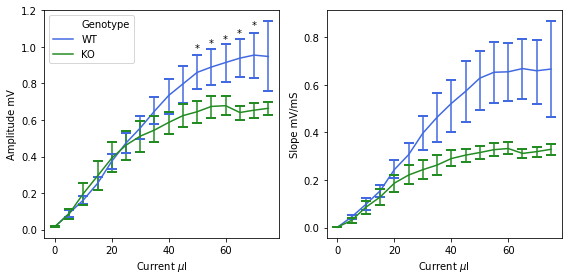

In [16]:
MF_fig, axs = plt.subplots(1, 2, figsize=(8,4))
sns.lineplot(x = 'Step_uI', y = 'Amp_1', data = IO_MF, hue = 'Genotype', hue_order = ['WT', 'KO'], palette = ['royalblue', 'forestgreen'], markers = {'marker': 'o', 'marker_size':10}, err_style = 'bars', ci = 68, err_kws = {'capsize': 5, 'capthick': 2}, ax = axs[0])
axs[0].set_ylabel('Amplitude mV')
axs[0].set_xlabel(r'Current $\mu$I')
axs[0].annotate(s='*', xy=(49,0.975), xycoords='data', xytext=(0, 0), textcoords='offset points', fontsize = 10)
axs[0].annotate(s='*', xy=(54,1.005), xycoords='data', xytext=(0, 0), textcoords='offset points', fontsize = 10)
axs[0].annotate(s='*', xy=(59,1.025), xycoords='data', xytext=(0, 0), textcoords='offset points', fontsize = 10)
axs[0].annotate(s='*', xy=(64,1.06), xycoords='data', xytext=(0, 0), textcoords='offset points', fontsize = 10)
axs[0].annotate(s='*', xy=(69,1.1), xycoords='data', xytext=(0, 0), textcoords='offset points', fontsize = 10)


sns.lineplot(x = 'Step_uI', y = 'Slope_1', data = IO_MF, hue = 'Genotype', hue_order = ['WT', 'KO'], palette = ['royalblue', 'forestgreen'], markers = {'marker': 'o', 'marker_size':10}, err_style = 'bars', ci = 68, err_kws = {'capsize': 5, 'capthick': 2}, ax = axs[1])
axs[1].set_ylabel('Slope mV/mS')
axs[1].set_xlabel(r'Current $\mu$I')
axs[1].get_legend().remove()
plt.tight_layout()

In [46]:
MF_fig.savefig('/Users/labc02/Documents/PDCB_data/Behavior/Figures/MF_IO.svg')

In [17]:
PPF_df = pd.read_csv('/Users/labc02/Documents/PDCB_data/fEPSP_data/fepsp_PPF.csv')

In [21]:
for syn in PPF_df['Synapse'].unique():
    print(syn)
    print('\n')
    for gen in PPF_df['Genotype'].unique():
        print(gen)
        print(pg.normality(PPF_df['PPF_Amp'][(PPF_df['Synapse'] == syn) & (PPF_df['Genotype'] == gen)]))

AC


KO
                W      pval  normal
PPF_Amp  0.885992  0.214666    True
WT
                W      pval  normal
PPF_Amp  0.925403  0.475215    True
MF


KO
               W      pval  normal
PPF_Amp  0.91941  0.501124    True
WT
                W      pval  normal
PPF_Amp  0.939117  0.572633    True


In [26]:
pg.madmedianrule(PPF_df['PPF_Amp'][(PPF_df['Synapse'] == 'AC') & (PPF_df['Genotype'] == 'WT')])

array([ True,  True, False, False, False,  True, False, False])

In [27]:
PPF_df['PPF_Amp'][(PPF_df['Synapse'] == 'AC') & (PPF_df['Genotype'] == 'WT')]

6     1.21
9     1.90
11    1.54
18    1.50
22    1.44
24    1.10
27    1.50
28    1.56
Name: PPF_Amp, dtype: float64

In [29]:
pg.madmedianrule(PPF_df['PPF_Amp'][(PPF_df['Synapse'] == 'MF') & (PPF_df['Genotype'] == 'WT')])

array([False, False, False, False,  True, False, False, False, False])

In [30]:
PPF_df['PPF_Amp'][(PPF_df['Synapse'] == 'MF') & (PPF_df['Genotype'] == 'WT')]

7     1.52
8     1.35
10    1.57
13    1.73
16    1.24
17    1.63
21    1.50
23    1.67
29    1.57
Name: PPF_Amp, dtype: float64

#### Reomoving outliers: idx 9, 16

In [31]:
PPF_df.drop(index = [9, 16], inplace = True)

In [32]:
for syn in PPF_df['Synapse'].unique():
    print('\n')
    print(syn)
    for gen in PPF_df['Genotype'].unique():
        print(gen)
        print(pg.normality(PPF_df['PPF_Amp'][(PPF_df['Synapse'] == syn) & (PPF_df['Genotype'] == gen)]))



AC
KO
                W      pval  normal
PPF_Amp  0.885992  0.214666    True
WT
                W      pval  normal
PPF_Amp  0.810723  0.052209    True


MF
KO
               W      pval  normal
PPF_Amp  0.91941  0.501124    True
WT
                W      pval  normal
PPF_Amp  0.966643  0.870443    True


In [43]:
pg.ttest(PPF_df['PPF_Amp'][(PPF_df['Synapse'] == 'AC') & (PPF_df['Genotype'] == 'WT')], PPF_df['PPF_Amp'][(PPF_df['Synapse'] == 'AC') & (PPF_df['Genotype'] == 'KO')], tail= 'greater')


,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,1.3255,9.734556,greater,0.107635,"[-0.08, inf]",0.652901,1.538,0.326744


In [42]:
help(pg.ttest)

Help on function ttest in module pingouin.parametric:

ttest(x, y, paired=False, tail='two-sided', correction='auto', r=0.707)
    T-test.
    
    Parameters
    ----------
    x : array_like
        First set of observations.
    y : array_like or float
        Second set of observations. If ``y`` is a single value, a one-sample
        T-test is computed.
    paired : boolean
        Specify whether the two observations are related (i.e. repeated
        measures) or independent.
    tail : string
        Specify whether the alternative hypothesis is `'two-sided'` or
        `'one-sided'`. Can also be `'greater'` or `'less'` to specify the
        direction of the test. `'greater'` tests the alternative that ``x``
        has a larger mean than ``y``. If tail is `'one-sided'`, Pingouin will
        automatically infer the one-sided alternative hypothesis based on the
        test statistic.
    correction : string or boolean
        For unpaired two sample T-tests, specify whether o

In [44]:
pg.ttest(PPF_df['PPF_Amp'][(PPF_df['Synapse'] == 'MF') & (PPF_df['Genotype'] == 'WT')], PPF_df['PPF_Amp'][(PPF_df['Synapse'] == 'MF') & (PPF_df['Genotype'] == 'KO')], tail = 'one-sided')


,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,0.871209,7.212455,greater,0.205849,"[-0.1, inf]",0.512156,1.148,0.226762


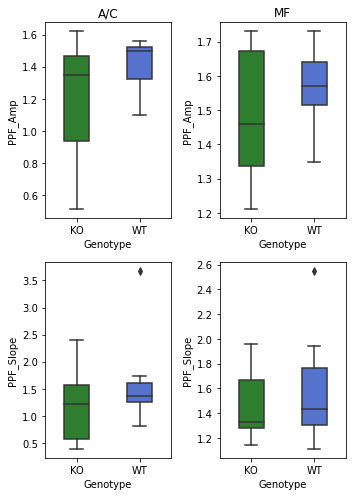

In [45]:
ppf_fig = plt.figure(figsize=(5,7))
ac_ax =  plt.subplot(2,2,1)
sns.boxplot(data = PPF_df[PPF_df['Synapse'] == 'AC'], x = 'Genotype', y = 'PPF_Amp', ax = ac_ax, palette=['forestgreen', 'royalblue'], width = .4)
ac_ax.set_title('A/C')
ac_ax2 = plt.subplot(2,2,3)
sns.boxplot(data = PPF_df[PPF_df['Synapse'] == 'AC'], x = 'Genotype', y = 'PPF_Slope', ax = ac_ax2, palette=['forestgreen', 'royalblue'], width = .4)
mf_ax = plt.subplot(2,2,2)
sns.boxplot(data = PPF_df[PPF_df['Synapse'] == 'MF'], x = 'Genotype', y = 'PPF_Amp', ax = mf_ax, palette=['forestgreen', 'royalblue'], width = .4)
mf_ax.set_title('MF')
mf_ax2 = plt.subplot(2,2,4)
sns.boxplot(data = PPF_df[PPF_df['Synapse'] == 'MF'], x = 'Genotype', y = 'PPF_Slope', ax = mf_ax2, palette=['forestgreen', 'royalblue'], width = .4)
plt.tight_layout()

#### New figure, only amp

In [48]:
ppf_fig.savefig('/Users/labc02/Documents/PDCB_data/Behavior/Figures/PPF_fig.svg')

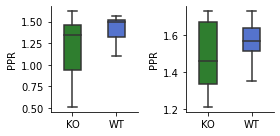

In [46]:
ppf_new= plt.figure(figsize=(4,2))
ac_ax =  plt.subplot(1,2,1)
sns.boxplot(data = PPF_df[PPF_df['Synapse'] == 'AC'], x = 'Genotype', y = 'PPF_Amp', ax = ac_ax, palette=['forestgreen', 'royalblue'], width = .4)
sns.despine()
plt.ylabel('PPR')
plt.xlabel('')
mf_ax = plt.subplot(1,2,2)
sns.boxplot(data = PPF_df[PPF_df['Synapse'] == 'MF'], x = 'Genotype', y = 'PPF_Amp', ax = mf_ax, palette=['forestgreen', 'royalblue'], width = .4)
sns.despine()
plt.ylabel('PPR')
plt.xlabel('')
plt.tight_layout()

In [48]:
ppf_new.savefig('/Users/labc02/Documents/PDCB_data/Figures/PPF_new.svg')

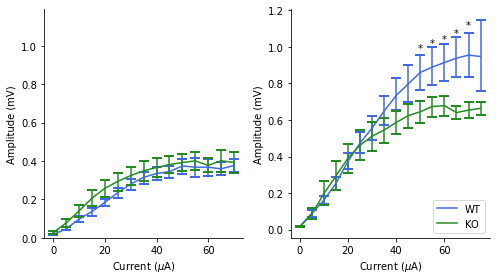

In [44]:
IO_fig = plt.figure(figsize = (7, 4))
axs_0 = plt.subplot(121)
sns.lineplot(x = 'Step_uI', y = 'Amp_1', data = IO_AC, hue = 'Genotype', hue_order = ['WT', 'KO'], palette = ['royalblue', 'forestgreen'], markers = {'marker': 'o', 'marker_size':10}, err_style = 'bars', ci = 68, err_kws = {'capsize': 5, 'capthick': 2}, ax = axs_0)
sns.despine()
axs_0.set_ylim(0.0, 1.19)
axs_0.set_ylabel('Amplitude (mV)')
axs_0.set_xlabel(r'Current ($\mu$A)')
axs_0.legend().remove()

axs_1 = plt.subplot(122)
sns.lineplot(x = 'Step_uI', y = 'Amp_1', data = IO_MF, hue = 'Genotype', hue_order = ['WT', 'KO'], palette = ['royalblue', 'forestgreen'], markers = {'marker': 'o', 'marker_size':10}, err_style = 'bars', ci = 68, err_kws = {'capsize': 5, 'capthick': 2}, ax = axs_1)
sns.despine()
axs_1.set_ylabel('Amplitude (mV)')
axs_1.set_xlabel(r'Current ($\mu$A)')
axs_1.annotate(s='*', xy=(49,0.975), xycoords='data', xytext=(0, 0), textcoords='offset points', fontsize = 10)
axs_1.annotate(s='*', xy=(54,1.005), xycoords='data', xytext=(0, 0), textcoords='offset points', fontsize = 10)
axs_1.annotate(s='*', xy=(59,1.025), xycoords='data', xytext=(0, 0), textcoords='offset points', fontsize = 10)
axs_1.annotate(s='*', xy=(64,1.06), xycoords='data', xytext=(0, 0), textcoords='offset points', fontsize = 10)
axs_1.annotate(s='*', xy=(69,1.1), xycoords='data', xytext=(0, 0), textcoords='offset points', fontsize = 10)
axs_1.legend(['WT', 'KO'], loc = 4)
plt.tight_layout()


In [45]:
IO_fig.savefig('/Users/labc02/Documents/PDCB_data/Behavior/Figures/IO_curve_fig.svg')

#### DCG-IV

In [63]:
dcg_df = pd.read_csv('/Users/labc02/Documents/PDCB_data/fEPSP_data/DCG_IV.csv')

([<matplotlib.axis.XTick at 0x11b071f40>,
 <a list of 12 Text major ticklabel objects>)

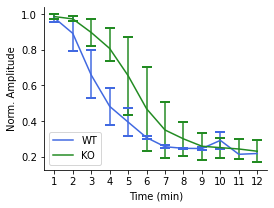

In [70]:
dcg_fig = plt.figure(figsize=(4, 3))
sns.lineplot(x = 'Time', y = 'Amp_nor', data = dcg_df, hue = 'Genotype', hue_order = ['WT', 'KO'], palette = ['royalblue', 'forestgreen'], markers = {'marker': 'o', 'marker_size':10}, err_style = 'bars', ci = 68, err_kws = {'capsize': 5, 'capthick': 2})
sns.despine()
plt.legend(['WT', 'KO'], loc = 3)
plt.xlabel('Time (min)')
plt.ylabel('Norm. Amplitude')
plt.xticks(range(1,13))

In [71]:
dcg_fig.savefig('/Users/labc02/Documents/PDCB_data/Behavior/Figures/DCGIV_fig.svg')